In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data = pd.read_csv('marketing_customer_analysis.csv', sep=",")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**1- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)**

In [ ]:
data.shape

(9134, 24)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [ ]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
ordered_columns = sorted(data.columns, reverse=False)
ordered_columns

['Coverage',
 'Customer',
 'Customer Lifetime Value',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy',
 'Policy Type',
 'Renew Offer Type',
 'Response',
 'Sales Channel',
 'State',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [ ]:
data = data[ordered_columns]
data.head()

,Coverage,Customer,Customer Lifetime Value,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Policies,Policy,Policy Type,Renew Offer Type,Response,Sales Channel,State,Total Claim Amount,Vehicle Class,Vehicle Size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,384.811147,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,1131.464935,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,566.472247,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,529.881344,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,138.130879,Four-Door Car,Medsize


In [ ]:
y = data['Total Claim Amount']
X = data.drop(['Total Claim Amount'], axis=1)
X.head()

,Coverage,Customer,Customer Lifetime Value,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Open Complaints,Number of Policies,Policy,Policy Type,Renew Offer Type,Response,Sales Channel,State,Vehicle Class,Vehicle Size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,0,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,0,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,0,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,0,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,0,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,Four-Door Car,Medsize


In [ ]:
numerical = X.select_dtypes(include = np.number)
categoricals = X.select_dtypes(include = np.object)
categoricals


<ipython-input-7-33cae61448d1>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = X.select_dtypes(include = np.object)


,Coverage,Customer,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Policy Type,Renew Offer Type,Response,Sales Channel,State,Vehicle Class,Vehicle Size
0,Basic,BU79786,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,Two-Door Car,Medsize
1,Extended,QZ44356,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,Four-Door Car,Medsize
2,Premium,AI49188,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,Two-Door Car,Medsize
3,Basic,WW63253,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,SUV,Medsize
4,Basic,HB64268,Bachelor,2/3/11,Employed,M,Rural,Single,Personal L1,Personal Auto,Offer1,No,Agent,Washington,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,LA72316,Bachelor,2/10/11,Employed,M,Urban,Married,Personal L1,Personal Auto,Offer2,No,Web,California,Four-Door Car,Medsize
9130,Extended,PK87824,College,2/12/11,Employed,F,Suburban,Divorced,Corporate L3,Corporate Auto,Offer1,Yes,Branch,California,Four-Door Car,Medsize
9131,Extended,TD14365,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate L2,Corporate Auto,Offer1,No,Branch,California,Four-Door Car,Medsize
9132,Extended,UP19263,College,2/3/11,Employed,M,Suburban,Married,Personal L2,Personal Auto,Offer3,No,Branch,California,Four-Door Car,Large


In [ ]:
categoricals = categoricals.drop(['Customer','Effective To Date'], axis = 1)
categoricals

,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Policy Type,Renew Offer Type,Response,Sales Channel,State,Vehicle Class,Vehicle Size
0,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,Two-Door Car,Medsize
1,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,Four-Door Car,Medsize
2,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,Two-Door Car,Medsize
3,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,SUV,Medsize
4,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Personal Auto,Offer1,No,Agent,Washington,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Personal Auto,Offer2,No,Web,California,Four-Door Car,Medsize
9130,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Corporate Auto,Offer1,Yes,Branch,California,Four-Door Car,Medsize
9131,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Corporate Auto,Offer1,No,Branch,California,Four-Door Car,Medsize
9132,Extended,College,Employed,M,Suburban,Married,Personal L2,Personal Auto,Offer3,No,Branch,California,Four-Door Car,Large


In [ ]:
data["Vehicle Size"].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

- Now we will try to check the normality of the numerical variables visually.
-Use seaborn library to construct distribution plots for the numerical variables

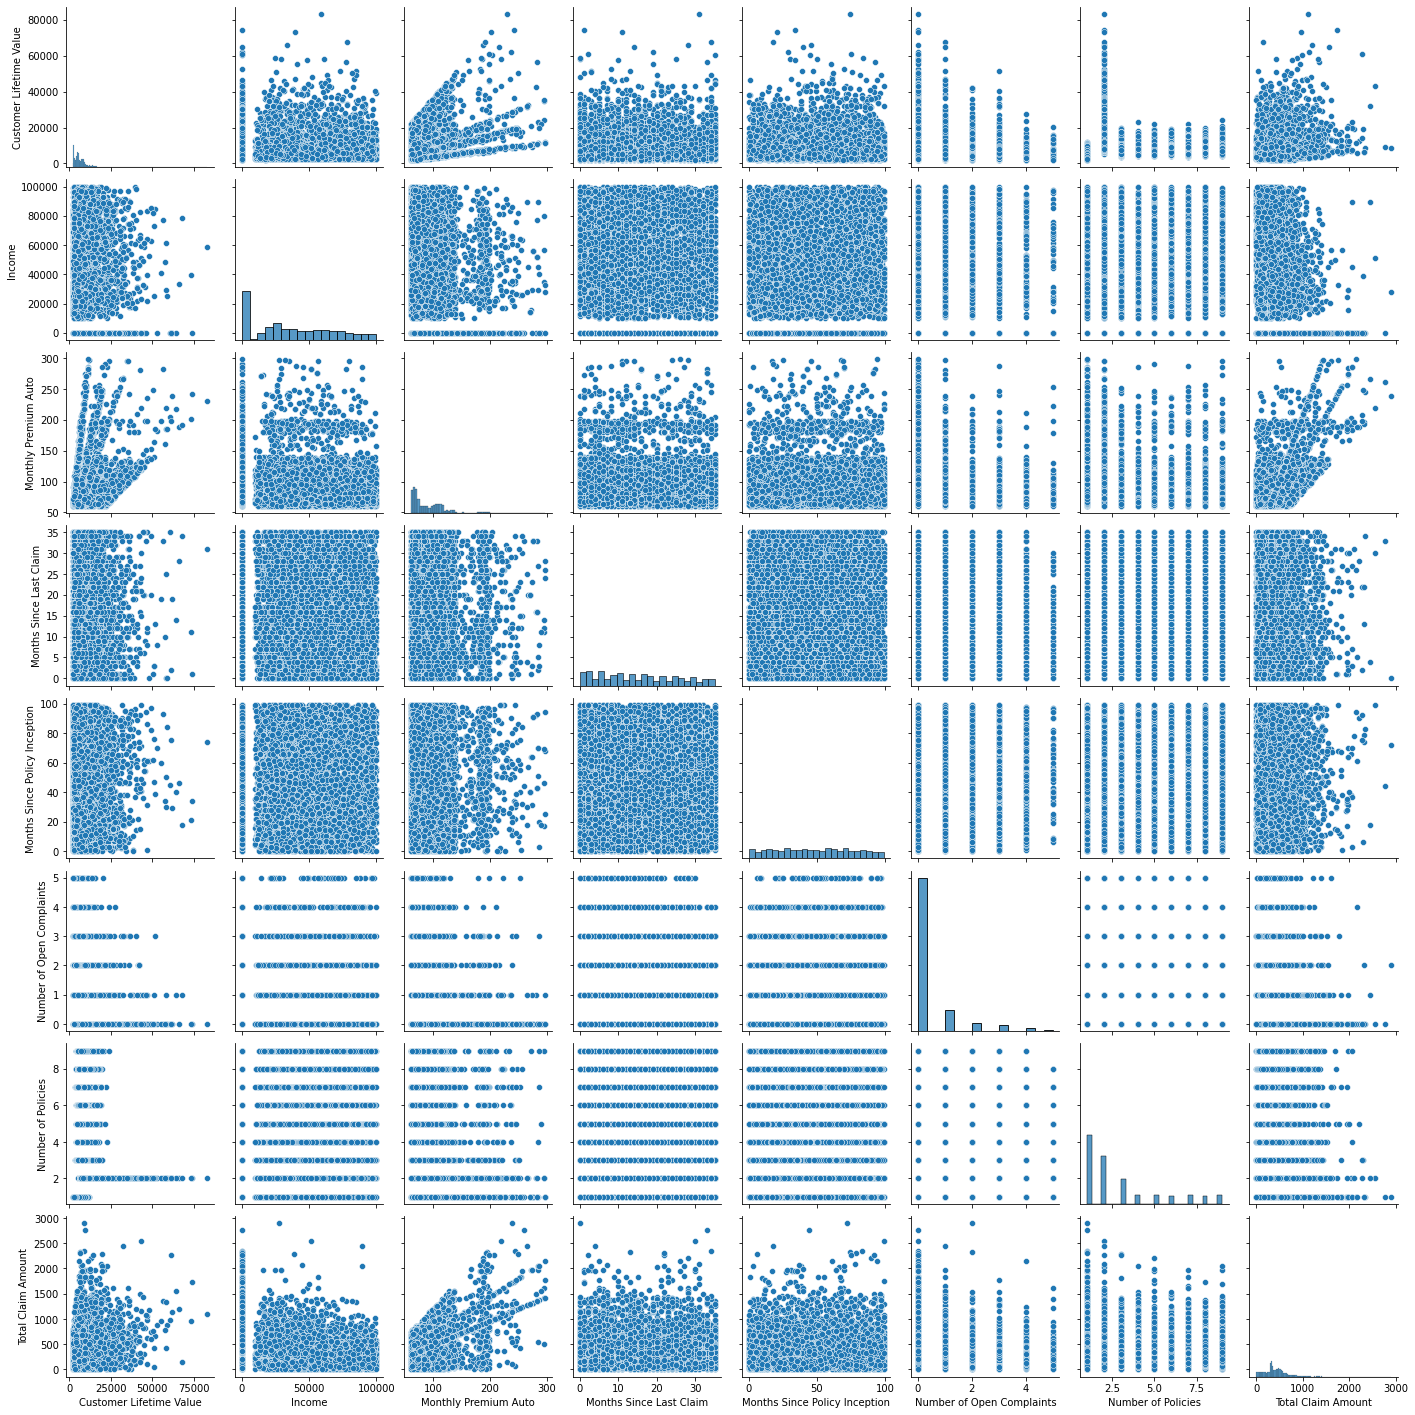

In [ ]:
sns.pairplot(numerical)

In [ ]:
numerical.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


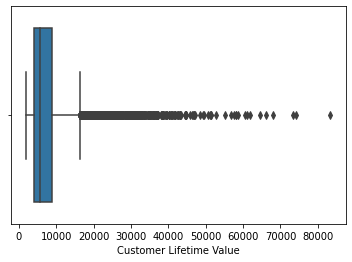

In [ ]:
sns.boxplot(x=numerical['Customer Lifetime Value'],whis=1.5)

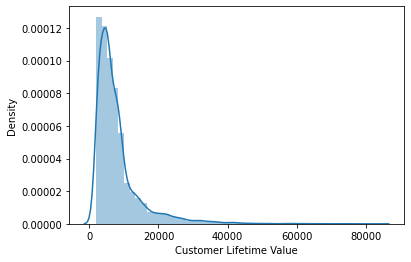

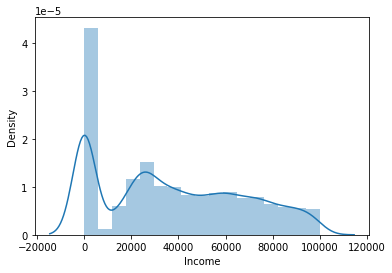

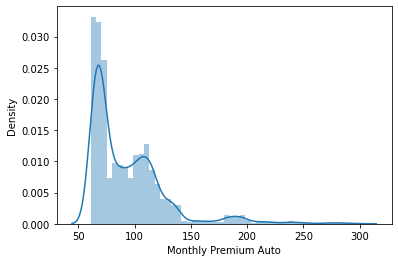

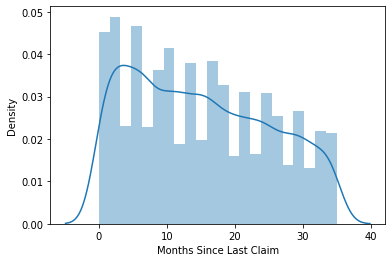

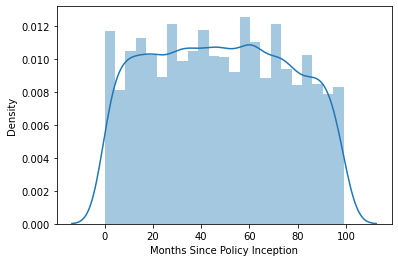

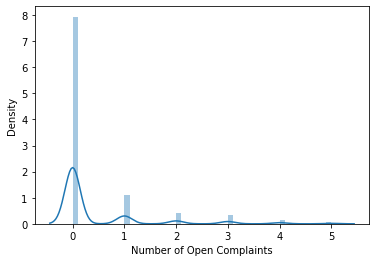

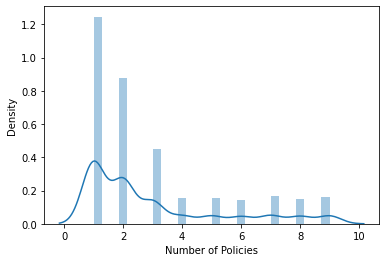

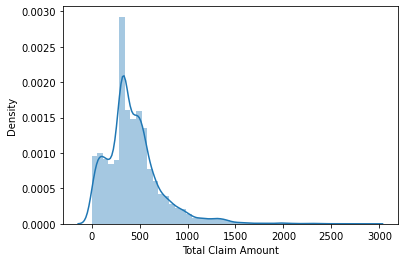

In [ ]:
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

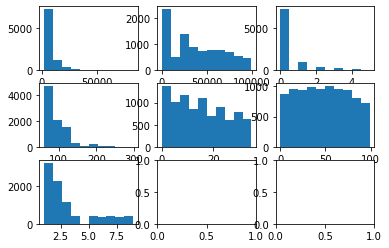

In [ ]:
#histograms ()
fig, axs = plt.subplots(3, 3)

axs[0, 0].hist(data['Customer Lifetime Value'])
axs[0, 1].hist(data['Income'])
axs[1, 0].hist(data['Monthly Premium Auto'])
axs[1, 1].hist(data['Months Since Last Claim'])
axs[1, 2].hist(data['Months Since Policy Inception'])
axs[0, 2].hist(data['Number of Open Complaints'])
axs[2, 0].hist(data['Number of Policies'])
plt.show()

In [ ]:
enc = OneHotEncoder(sparse=False)
columns_to_one_hot = ['Marital Status','Gender','Policy Type','Response']
encoded_array = enc.fit_transform(categoricals.loc[:,columns_to_one_hot])
categoricals_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
categoricals_sklearn_encoded = pd.concat([categoricals,categoricals_encoded],axis=1)
categoricals_sklearn_encoded.drop(labels= columns_to_one_hot,axis=1,inplace=True)
categoricals_sklearn_encoded

,Coverage,Education,EmploymentStatus,Location Code,Policy,Renew Offer Type,Sales Channel,State,Vehicle Class,Vehicle Size,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Gender_F,Gender_M,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Response_No,Response_Yes
0,Basic,Bachelor,Employed,Suburban,Corporate L3,Offer1,Agent,Washington,Two-Door Car,Medsize,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Extended,Bachelor,Unemployed,Suburban,Personal L3,Offer3,Agent,Arizona,Four-Door Car,Medsize,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Premium,Bachelor,Employed,Suburban,Personal L3,Offer1,Agent,Nevada,Two-Door Car,Medsize,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Basic,Bachelor,Unemployed,Suburban,Corporate L2,Offer1,Call Center,California,SUV,Medsize,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,Basic,Bachelor,Employed,Rural,Personal L1,Offer1,Agent,Washington,Four-Door Car,Medsize,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,Bachelor,Employed,Urban,Personal L1,Offer2,Web,California,Four-Door Car,Medsize,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9130,Extended,College,Employed,Suburban,Corporate L3,Offer1,Branch,California,Four-Door Car,Medsize,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9131,Extended,Bachelor,Unemployed,Suburban,Corporate L2,Offer1,Branch,California,Four-Door Car,Medsize,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9132,Extended,College,Employed,Suburban,Personal L2,Offer3,Branch,California,Four-Door Car,Large,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
#label encoding
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
categoricals['Renew Offer Type']= label_encoder.fit_transform(categoricals['Renew Offer Type'])
  
categoricals['Renew Offer Type'].unique()


array([0, 2, 1, 3])

In [ ]:
data['Vehicle Size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [ ]:
#ordinal encoding (method 1 without using OrdinalEncoder)
scale_mapper = {'Small':1, 'Medsize':2, 'Large':3}
categoricals['Vehicle Size'] = categoricals['Vehicle Size'].replace(scale_mapper) 
categoricals['Vehicle Size']

0       2
1       2
2       2
3       2
4       2
       ..
9129    2
9130    2
9131    2
9132    3
9133    2
Name: Vehicle Size, Length: 9134, dtype: int64

In [ ]:
#ordinal encoding (method 2)
#from sklearn.preprocessing import OrdinalEncoder
#VehicleSize_column = categoricals[["Vehicle Size"]]

#encoder = OrdinalEncoder()
#VehicleSize_encoded = encoder.fit_transform(VehicleSize_column)
#VehicleSize_encoded


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [ ]:
numerical = X.select_dtypes(include = np.number)
X = pd.concat([numerical, categoricals['Renew Offer Type'] , categoricals['Vehicle Size'], categoricals_encoded], axis=1)
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Renew Offer Type,Vehicle Size,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Gender_F,Gender_M,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Response_No,Response_Yes
0,2763.519279,56274,69,32,5,0,1,0,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,6979.535903,0,94,13,42,0,8,2,2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,12887.431650,48767,108,18,38,0,2,0,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7645.861827,0,106,18,65,0,7,0,2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,2813.692575,43836,73,12,44,0,1,0,2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
#Linear Regression
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
X_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Renew Offer Type,Vehicle Size,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Gender_F,Gender_M,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Response_No,Response_Yes
434,5015.009472,48567,130,12,15,0,1,1,2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4641,5149.301306,26877,131,5,2,0,1,3,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4952,4904.894731,12902,139,3,51,0,1,0,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1489,8510.525936,0,121,5,94,0,8,1,2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
812,3278.531880,70247,83,13,19,1,1,3,2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
predictions  = model.predict(X_test)
predictions.shape

(2741,)

In [ ]:
predictions

array([379.16054061, 425.28094819, 276.17271009, ..., 471.26504142,
       371.99549552, 707.9467911 ])

In [ ]:
#Model Validation
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)

print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)


r2 =  0.5477432887765872
RMSE =  192.14490328667625
MSE =  36919.663859046166


Based on r2, it's not the best model but I can still improve in the future